In [1]:
#imports
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import *

In [2]:
#define how to get the phase
c=299792458

def get_phase(omega,Eomega, lambda0):
    #retrieves phase and subtracts the arbitrary phase at omega0
    om0 = 2*np.pi*c/lambda0 #central frequency
    om0_idx = np.argmin(np.abs(omega-om0))
 
    domega = omega[2] - omega[1]
    tau = np.pi/domega
    phase_raw = np.angle(Eomega)
    phase = np.unwrap(phase_raw - omega*tau)
    phase=phase*(-1)#optics convention
    phase -= phase[om0_idx]#subtract arbitrary phase offset
    return phase

In [3]:
#define inverse fourier transform
def f_to_t_irfft(f, Ef):
    """
    Input of f and Ef
    Returns t, Et
    """
    Et = np.fft.irfft(Ef)
    N = len(Ef) # Number of points
    df=np.abs(f[1]-f[0])#smallest frequency difference gives inverse of duration
    T=1/df#overall duration
    t=np.linspace(-T/2,T/2,len(Et))#construct time axis
    return t,Et

In [6]:
#import from csv with columns omega, Eomega_real, Eomega_imag
import pandas as pd
df_0 = pd.read_csv("C:\\Users\\ML\\OneDrive - Imperial College London\\MSci_Project\\code\\Synth\\Optimising-Field-Synthesiser\\HCF sim\\Python\\Test_Data_irfft.csv",skipinitialspace=True)
omega=df_0.iloc[:,0]
Eomega_real=df_0.iloc[:,1]
Eomega_imag=df_0.iloc[:,2]
# using np.fft.irfft in your function above means that you don't get that error
# with the pandas data you do with the scipy version.
Eomega = Eomega_real + 1j*Eomega_imag
lambda0=800e-9
phase=get_phase(omega,Eomega,lambda0)

In [7]:
i1, i2 = 200, 350 

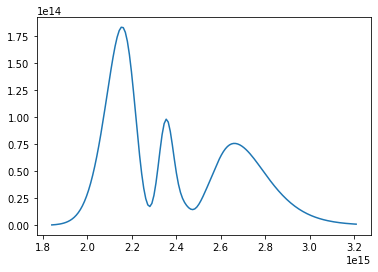

In [8]:
plt.plot(omega[i1:i2], np.abs(Eomega[i1:i2])**2)
plt.show()

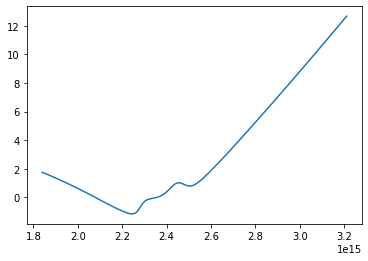

In [9]:
plt.plot(omega[i1:i2], phase[i1:i2])
plt.show()

In [10]:
t, Et = f_to_t_irfft(omega/(2*np.pi), Eomega)

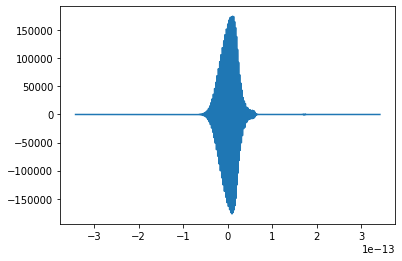

In [11]:
plt.plot(t, Et)
plt.show()

In [12]:
k1, k2 = 1600, 2500

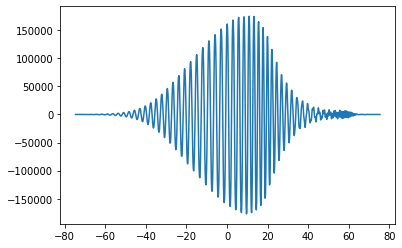

In [13]:
plt.plot(1e15*t[k1:k2], Et[k1:k2])
plt.show()

In [15]:
# ifft gives complex time dependent field from which it is much easier to extract
# pulse envelope and phase
Et2 = np.fft.ifft(Eomega)
dom = omega[2] - omega[1]
df = dom/(2*np.pi)
t2 = np.fft.fftshift(np.fft.fftfreq(len(Et2), d=df))

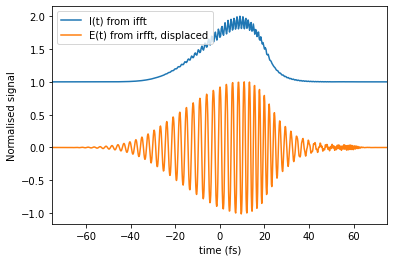

In [16]:
plt.plot(1e15*t2, 1+np.abs(Et2)**2/max(np.abs(Et2)**2), label="I(t) from ifft") # displace by 1 unit for clarity
plt.plot(1e15*t, Et/max(Et), label="E(t) from irfft, displaced")
plt.legend()
plt.xlabel("time (fs)")
plt.ylabel("Normalised signal")
plt.xlim(-75,75)
plt.show()

## Not sure if ripple on I(t) is real??

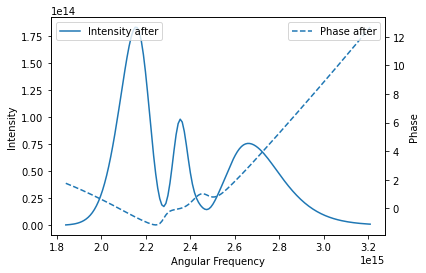

In [89]:
#get the phase and plot intensity envelope and phase
lambda0=800e-9
phase=get_phase(omega,Eomega,lambda0)

#plot
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.set_xlabel('Angular Frequency')
ax2.set_ylabel('Phase')
ax1.set_ylabel('Intensity')

ax2.plot(omega[200:350], phase[200:350], '--', label='Phase after')
ax1.plot(omega[200:350], np.abs(Eomega[200:350])**2, label='Intensity after')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

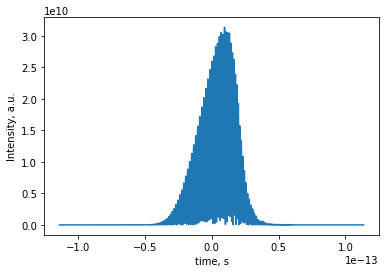

In [90]:
#Fourier transform 

t,Et=f_to_t_irfft(omega/(2*np.pi),Eomega)

#plot
plt.plot(t[int(len(t)/3):int(2*len(t)/3)],np.abs(Et[int(len(t)/3):int(2*len(t)/3)])**2)
plt.xlabel("time, s")
plt.ylabel("Intensity, a.u.")
plt.show()